# Recommendation based on the similarity score of the Book content and average weighted rating of the users

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
dataset1 = pd.read_csv('Recommender_system_Rokomari_books\Recommender_System\Rokomari_Books - Translated All.csv')
dataset1.head()

,Title,Authors,Original Price,Selling Price,Discount,Rating_Count,Rating,Category_en
0,Evil spirits (hardcover),Mushtaq Ahmed,TK. 200,TK. 156,You Save TK. 44,10 Ratings,4.2,Supernatural and ghost
1,Smart English Smart Way to Learn English - 2nd...,Farid Ahmed,TK. 250,TK. 188,You Save TK. 62,137 Ratings,3.74,English grammar and language education
2,What will people say?(Hardcover),Ayman Sadiq,TK. 255,TK. 191,You Save TK. 64,1848 Ratings,4.08,Self Development and Motivation
3,Rahele Bellayat (Hardcover),Dr.Khondaker Abdullah Jahangir,TK. 460,TK. 322,You Save TK. 138,584 Ratings,4.67,Spirituality and Sufism
4,Not in good (hardcover),Ayman Sadiq,TK. 300,TK. 225,You Save TK. 75,1110 Ratings,4.28,Student Life Development


# Recommendation based on the average weighted rating

In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           6506 non-null   object
 1   Authors         6506 non-null   object
 2   Original Price  6503 non-null   object
 3   Selling Price   6506 non-null   object
 4   Discount        6506 non-null   object
 5   Rating_Count    3899 non-null   object
 6   Rating          3899 non-null   object
 7   Category_en     6506 non-null   object
dtypes: object(8)
memory usage: 406.8+ KB


In [4]:
dataset1['Rating_Count'].isnull().sum()
dataset1['Rating'].isnull().sum()

2607

In [5]:

dataset1.Rating = dataset1.Rating.str.replace('[Ratings]', '')
dataset1.Rating_Count = dataset1.Rating_Count.str.replace('[Ratings]', '')
dataset1.Rating = dataset1.Rating.replace(np.nan,0)
dataset1.Rating_Count = dataset1.Rating_Count.replace(np.nan,0)

<ipython-input-5-b6d113ab3fe4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1.Rating = dataset1.Rating.str.replace('[Ratings]', '')
<ipython-input-5-b6d113ab3fe4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1.Rating_Count = dataset1.Rating_Count.str.replace('[Ratings]', '')


In [6]:
dataset1.head()

,Title,Authors,Original Price,Selling Price,Discount,Rating_Count,Rating,Category_en
0,Evil spirits (hardcover),Mushtaq Ahmed,TK. 200,TK. 156,You Save TK. 44,10,4.2,Supernatural and ghost
1,Smart English Smart Way to Learn English - 2nd...,Farid Ahmed,TK. 250,TK. 188,You Save TK. 62,137,3.74,English grammar and language education
2,What will people say?(Hardcover),Ayman Sadiq,TK. 255,TK. 191,You Save TK. 64,1848,4.08,Self Development and Motivation
3,Rahele Bellayat (Hardcover),Dr.Khondaker Abdullah Jahangir,TK. 460,TK. 322,You Save TK. 138,584,4.67,Spirituality and Sufism
4,Not in good (hardcover),Ayman Sadiq,TK. 300,TK. 225,You Save TK. 75,1110,4.28,Student Life Development


In [7]:
dataset1['Rating_Count'].isnull().sum()

0

In [8]:
# dataset1['Rating_Count'].isnull().sum()
dataset1['Rating'].isnull().sum()

0

In [9]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           6506 non-null   object
 1   Authors         6506 non-null   object
 2   Original Price  6503 non-null   object
 3   Selling Price   6506 non-null   object
 4   Discount        6506 non-null   object
 5   Rating_Count    6506 non-null   object
 6   Rating          6506 non-null   object
 7   Category_en     6506 non-null   object
dtypes: object(8)
memory usage: 406.8+ KB


In [10]:
dataset1['Rating'] = dataset1['Rating'].astype(float, errors = 'raise')
dataset1['Rating_Count'] = dataset1['Rating_Count'].astype(float, errors = 'raise')

In [11]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           6506 non-null   object 
 1   Authors         6506 non-null   object 
 2   Original Price  6503 non-null   object 
 3   Selling Price   6506 non-null   object 
 4   Discount        6506 non-null   object 
 5   Rating_Count    6506 non-null   float64
 6   Rating          6506 non-null   float64
 7   Category_en     6506 non-null   object 
dtypes: float64(2), object(6)
memory usage: 406.8+ KB


In [12]:
dataset1.tail(10)

,Title,Authors,Original Price,Selling Price,Discount,Rating_Count,Rating,Category_en
6496,Mashakhkh Hufafaz (Hardcover),HM Farid Uddin Khandaker (Editor),TK. 160,TK. 112,You Save TK. 48,0.0,0.0,"Prophet Messenger, Sahaba, Tabee and Oli-Awlia"
6497,Jilahji's monthly and exclusion (Paperback),Shaikh Abdur Rahman bin Mubarak Ali,TK. 100,TK. 64,You Save TK. 36,0.0,0.0,The help of Islamic period and period
6498,Heart melts series-54: forgotten life-2 (hardc...,Maulana Mohammad Mofizul Islam,TK. 130,TK. 91,You Save TK. 39,0.0,0.0,Personal and Family Life
6499,The Penal Code-2nd Ed. 2014,Justice Siddiqur Rahman Miah,"TK. 1,100",TK. 605,You Save TK. 495,0.0,0.0,Penal Code
6500,Government notification information of governm...,Md.Bashir Ahmad,TK. 360,TK. 252,You Save TK. 108,0.0,0.0,Documentary law
6501,In Riyadhus (1st chunk) (hardcover),Imam Muhiuddin Yahya An-Nabu (R),TK. 250,TK. 175,You Save TK. 75,0.0,0.0,Hadith and Sunnat
6502,Business policy,AKM Salahuddin,TK. 350,TK. 245,You Save TK. 105,0.0,0.0,Business policy and application / commercial g...
6503,Larry King,Sheikh Abdul Hakim (translator),TK. 300,TK. 210,You Save TK. 90,0.0,0.0,"Translation: biography, memorabilia and interview"
6504,The entire caravan of the light (hardcover),Dr.Abdur Rahman Rafat Pasha Rah,TK. 700,TK. 455,You Save TK. 245,0.0,0.0,Islamic translation book
6505,Small story and advice of grandfather's mouth ...,SD Al Shafi (editor),TK. 220,TK. 132,You Save TK. 88,0.0,0.0,Child-teenage story


### Checking the distribution of the Rating and Raing_count

In [13]:
dataset1.Rating.describe()

count    6506.000000
mean        1.870725
std         2.026696
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        20.000000
Name: Rating, dtype: float64

In [14]:
dataset1.Rating_Count.describe()

count    6506.000000
mean        6.967458
std        45.369418
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max      2354.000000
Name: Rating_Count, dtype: float64

## Calculation of Wieigted Average:

![average_weighted_equ.JPG.JPG](attachment:average_weighted_equ.JPG.JPG)

The equation used for weighted average is:

W= (Rv + Cm)/(v+m)

where,
W= Weighted Rating
R= average for the voting as a number from 0-20= Rating
v= number of votes for the for particular book.
m= minimum votes required to be listed in top 20 (400)
C= the mean vote across the whole report 


In [15]:
# Calculate all the components based on the above formula

v = dataset1['Rating_Count']
R = dataset1['Rating']
C = dataset1['Rating'].mean()
m = dataset1['Rating_Count'].quantile(0.60)

In [16]:
dataset1['weighted_average']=((R*v)+ (C*m))/(v+m)

In [17]:
dataset1.head()

,Title,Authors,Original Price,Selling Price,Discount,Rating_Count,Rating,Category_en,weighted_average
0,Evil spirits (hardcover),Mushtaq Ahmed,TK. 200,TK. 156,You Save TK. 44,10.0,4.20,Supernatural and ghost,3.534493
1,Smart English Smart Way to Learn English - 2nd...,Farid Ahmed,TK. 250,TK. 188,You Save TK. 62,137.0,3.74,English grammar and language education,3.686971
2,What will people say?(Hardcover),Ayman Sadiq,TK. 255,TK. 191,You Save TK. 64,1848.0,4.08,Self Development and Motivation,4.075228
3,Rahele Bellayat (Hardcover),Dr.Khondaker Abdullah Jahangir,TK. 460,TK. 322,You Save TK. 138,584.0,4.67,Spirituality and Sufism,4.650957
4,Not in good (hardcover),Ayman Sadiq,TK. 300,TK. 225,You Save TK. 75,1110.0,4.28,Student Life Development,4.271349


In [18]:
dataset1_sorted_ranking=dataset1.sort_values('weighted_average',ascending=False)
dataset1_sorted_ranking[['Title', 'Rating_Count', 'Rating', 'weighted_average']].head(20)

,Title,Rating_Count,Rating,weighted_average
6359,No one knows ...,4.70,20.00,11.664701
6335,Life where dynamic (hardcover),4.86,14.00,8.524030
4320,Debut,5.00,11.00,6.942545
2954,The Kind Worth Killing (Hardcover),4.82,11.00,6.859739
5359,Legend (Hardcover),4.55,11.00,6.728994
2925,Reason to-Stay Alive (Hardcover),5.00,10.00,6.386989
3603,Kalabir (appearance) (hardcover),4.50,10.00,6.174459
4325,Jannati people's counting (hardcover),5.00,9.00,5.831434
3192,Ideal husband - wife - 2,5.00,9.00,5.831434
5510,Locus (Hardcover),5.00,9.00,5.831434


In [19]:
dataset1_sorted_ranking.weighted_average.describe()

count    6506.000000
mean        2.283707
std         0.848681
min         1.386989
25%         1.870725
50%         1.870725
75%         2.746280
max        11.664701
Name: weighted_average, dtype: float64

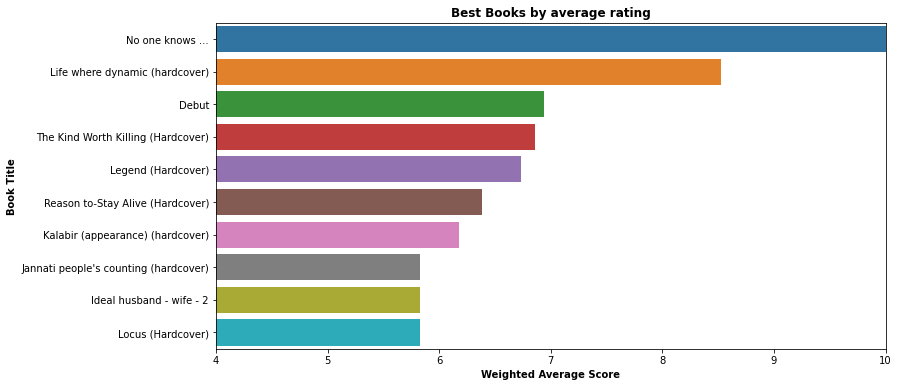

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_average=dataset1_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['Title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Books by average rating', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Book Title', weight='bold')
plt.savefig('best_books.png')

In [21]:
print("Total unique titles in the dataset: " + str(dataset1['Title'].nunique()))
print("Total unique catagories in the dataset: " + str(dataset1['Category_en'].nunique()))
print("Total unique authors in the dataset: " + str(dataset1['Authors'].nunique()))
#print("Total unique Publishers in the dataset: " + str(dataset['Publishers'].nunique()))

Total unique titles in the dataset: 6253
Total unique catagories in the dataset: 654
Total unique authors in the dataset: 3349


In [22]:

df = dataset1[['Title', 'Authors', 'Category_en', 'weighted_average']]
df.head()

,Title,Authors,Category_en,weighted_average
0,Evil spirits (hardcover),Mushtaq Ahmed,Supernatural and ghost,3.534493
1,Smart English Smart Way to Learn English - 2nd...,Farid Ahmed,English grammar and language education,3.686971
2,What will people say?(Hardcover),Ayman Sadiq,Self Development and Motivation,4.075228
3,Rahele Bellayat (Hardcover),Dr.Khondaker Abdullah Jahangir,Spirituality and Sufism,4.650957
4,Not in good (hardcover),Ayman Sadiq,Student Life Development,4.271349


In [23]:

df['Category_en'] = df['Category_en'].map(lambda x: x.lower().split('/'))
df['Category_en'].head()

<ipython-input-23-41bdf0e2a8a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category_en'] = df['Category_en'].map(lambda x: x.lower().split('/'))


0                    [supernatural and ghost]
1    [english grammar and language education]
2           [self development and motivation]
3                   [spirituality and sufism]
4                  [student life development]
Name: Category_en, dtype: object

In [24]:

df['Authors'] = df['Authors'].map(lambda x: x.lower().split(','))
df.head()

<ipython-input-24-fca0c727bf41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Authors'] = df['Authors'].map(lambda x: x.lower().split(','))


,Title,Authors,Category_en,weighted_average
0,Evil spirits (hardcover),[mushtaq ahmed],[supernatural and ghost],3.534493
1,Smart English Smart Way to Learn English - 2nd...,[farid ahmed],[english grammar and language education],3.686971
2,What will people say?(Hardcover),[ayman sadiq],[self development and motivation],4.075228
3,Rahele Bellayat (Hardcover),[dr.khondaker abdullah jahangir],[spirituality and sufism],4.650957
4,Not in good (hardcover),[ayman sadiq],[student life development],4.271349


In [25]:
for index, row in df.iterrows():
    row['Authors'] = [x.lower().replace(' ', '') for x in row['Authors']]

In [26]:
df.head(20)

,Title,Authors,Category_en,weighted_average
0,Evil spirits (hardcover),[mushtaq ahmed],[supernatural and ghost],3.534493
1,Smart English Smart Way to Learn English - 2nd...,[farid ahmed],[english grammar and language education],3.686971
2,What will people say?(Hardcover),[ayman sadiq],[self development and motivation],4.075228
3,Rahele Bellayat (Hardcover),[dr.khondaker abdullah jahangir],[spirituality and sufism],4.650957
4,Not in good (hardcover),[ayman sadiq],[student life development],4.271349
5,Mathematical mathematics mathematics (hardcover),[chamok hasan],[mathematics],4.574309
6,Recharge your down battery (hardcover),[jhankar mahmud],[student life development],4.572570
7,Programming (Hardcover) for Hababuda,[jhankar mahmud],[computer programming],4.515844
8,Digit brother (hardcover),[chamok hasan],[mathematics],4.365588
9,The Prayer of the Prophet (peace be upon him) ...,[allama muhammad nasiruddin albani (rh)],"[salat , prayer]",4.171334


In [27]:
df.set_index('Title', inplace=True)
df.head()

,Authors,Category_en,weighted_average
Title,,,
Evil spirits (hardcover),[mushtaq ahmed],[supernatural and ghost],3.534493
Smart English Smart Way to Learn English - 2nd chunk,[farid ahmed],[english grammar and language education],3.686971
What will people say?(Hardcover),[ayman sadiq],[self development and motivation],4.075228
Rahele Bellayat (Hardcover),[dr.khondaker abdullah jahangir],[spirituality and sufism],4.650957
Not in good (hardcover),[ayman sadiq],[student life development],4.271349


In [28]:
df1= df.drop(columns='weighted_average')
df1.head()

,Authors,Category_en
Title,,
Evil spirits (hardcover),[mushtaq ahmed],[supernatural and ghost]
Smart English Smart Way to Learn English - 2nd chunk,[farid ahmed],[english grammar and language education]
What will people say?(Hardcover),[ayman sadiq],[self development and motivation]
Rahele Bellayat (Hardcover),[dr.khondaker abdullah jahangir],[spirituality and sufism]
Not in good (hardcover),[ayman sadiq],[student life development]


In [29]:
df2=df.copy()


In [30]:
df2

,Authors,Category_en,weighted_average
Title,,,
Evil spirits (hardcover),[mushtaq ahmed],[supernatural and ghost],3.534493
Smart English Smart Way to Learn English - 2nd chunk,[farid ahmed],[english grammar and language education],3.686971
What will people say?(Hardcover),[ayman sadiq],[self development and motivation],4.075228
Rahele Bellayat (Hardcover),[dr.khondaker abdullah jahangir],[spirituality and sufism],4.650957
Not in good (hardcover),[ayman sadiq],[student life development],4.271349
...,...,...,...
In Riyadhus (1st chunk) (hardcover),[imam muhiuddin yahya an-nabu (r)],[hadith and sunnat],1.870725
Business policy,[akm salahuddin],"[business policy and application , commercial...",1.870725
Larry King,[sheikh abdul hakim (translator)],"[translation: biography, memorabilia and inter...",1.870725


In [31]:
df=df1.copy()
df 

,Authors,Category_en
Title,,
Evil spirits (hardcover),[mushtaq ahmed],[supernatural and ghost]
Smart English Smart Way to Learn English - 2nd chunk,[farid ahmed],[english grammar and language education]
What will people say?(Hardcover),[ayman sadiq],[self development and motivation]
Rahele Bellayat (Hardcover),[dr.khondaker abdullah jahangir],[spirituality and sufism]
Not in good (hardcover),[ayman sadiq],[student life development]
...,...,...
In Riyadhus (1st chunk) (hardcover),[imam muhiuddin yahya an-nabu (r)],[hadith and sunnat]
Business policy,[akm salahuddin],"[business policy and application , commercial..."
Larry King,[sheikh abdul hakim (translator)],"[translation: biography, memorabilia and inter..."


In [32]:
df['bag_of_words'] = ''
columns = df.columns
for index, row in df.iterrows():
    words = ''
    for col in columns:
        words = words + ' '.join(row[col]) + ' '
    row['bag_of_words'] = words
df.drop(columns = [col for col in df.columns if col != 'bag_of_words'], inplace=True)

In [33]:
df['bag_of_words']

Title
Evil spirits (hardcover)                                                           mushtaq ahmed supernatural and ghost  
Smart English Smart Way to Learn English - 2nd chunk                    farid ahmed english grammar and language educa...
What will people say?(Hardcover)                                            ayman sadiq self development and motivation  
Rahele Bellayat (Hardcover)                                             dr.khondaker abdullah jahangir spirituality an...
Not in good (hardcover)                                                            ayman sadiq student life development  
                                                                                              ...                        
In Riyadhus (1st chunk) (hardcover)                                     imam muhiuddin yahya an-nabu (r) hadith and su...
Business policy                                                         akm salahuddin business policy and application...
Larry King        

In [34]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['bag_of_words'])

indices = pd.Series(df.index)
indices[:5]

0                             Evil spirits (hardcover)
1    Smart English Smart Way to Learn English - 2nd...
2                     What will people say?(Hardcover)
3                          Rahele Bellayat (Hardcover)
4                              Not in good (hardcover)
Name: Title, dtype: object

In [35]:

idx = indices[indices == 'What will people say?(Hardcover)'].index[0]
idx

2

In [36]:
count_matrix

<6506x3566 sparse matrix of type '<class 'numpy.int64'>'
	with 44309 stored elements in Compressed Sparse Row format>

In [37]:

cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.3380617 , 0.18257419, ..., 0.1490712 , 0.        ,
        0.        ],
       [0.3380617 , 1.        , 0.15430335, ..., 0.12598816, 0.        ,
        0.        ],
       [0.18257419, 0.15430335, 1.        , ..., 0.13608276, 0.        ,
        0.        ],
       ...,
       [0.1490712 , 0.12598816, 0.13608276, ..., 1.        , 0.11111111,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11111111, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [38]:
cosine_sim.shape

(6506, 6506)

In [39]:

def recommendations(title):
    recommended_books = []
    recommended_books_wa = []
    idx = indices[indices == title].index[0]
    
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    top_10_indexes = list(score_series.iloc[1:51].index)
    
    for i in top_10_indexes:
        recommended_books.append(list(df2.index)[i])
    for i in top_10_indexes:
        recommended_books_wa.append(list(df2.weighted_average)[i])
    Book_list_poplarity = pd.DataFrame(
        { 'Title':recommended_books,
          'Popularity': recommended_books_wa

        })
        
    return Book_list_poplarity.sort_values('Popularity',ascending=False)

In [40]:
recommendations('Rahele Bellayat (Hardcover)')


,Title,Popularity
16,"Salat, Duita and Yikar (Hardcover)",4.801454
10,Fraud (Hardcover) named Hadith,4.685498
1,Sahih Mashmanun Ozififa (Paperback),4.675522
27,Ramadan's Saogat (Paperback),4.611658
13,Munazat and Prayer (Paperback),4.602921
9,Ehayaus Sunan (Hardcover),4.568039
17,The Quran Sunnah (Paperback),4.564498
15,"Bible, Injil Sharif and Christian Religion (Pa...",4.559849
2,Islamic Creed (Hardcover),4.550125
23,Ask and reply (1st chunk) (hardcover),4.542760
